In [5]:
# 1. PCA Implementation

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns=np.append(cancer['feature_names'], ['target']))

cancer.keys()

print(cancer["DESCR"])


# 2. Dimensionality Reduction.
# Import necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
cancer = load_breast_cancer()
cancer_data = cancer.data

# Standardize
scaler = StandardScaler()
scaled_cancer_data = scaler.fit_transform(cancer_data)

# Reduce the dataset into 2 PCA components for the project.
pca = PCA(n_components=2)
cancer_data_pca = pca.fit_transform(scaled_cancer_data)

# Reduced dataframe
df_pca = pd.DataFrame(cancer_data_pca, columns=['PC1', 'PC2'])


# Dataframe target variable
df_pca['target'] = cancer.target






.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1-score: 0.9790
AUC-ROC: 0.9974


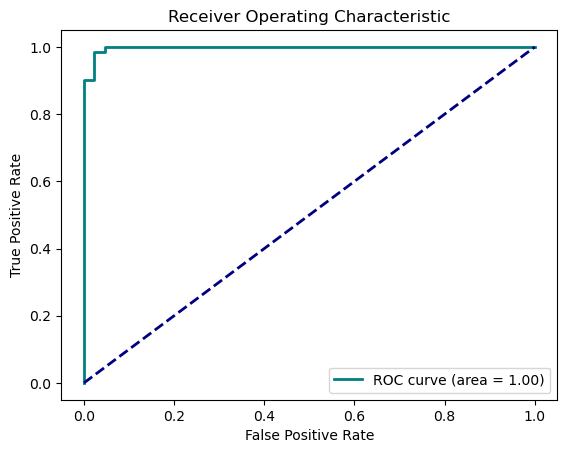

In [11]:
# 3. Implementing logistic regression for prediction.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target

scaler = StandardScaler()
scaled_cancer_data = scaler.fit_transform(cancer_data)

# Separate into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(scaled_cancer_data, Y, test_size=0.2, random_state=42)

# Train regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

# Predict
Y_pred = model.predict(X_test)

# Measure model performance
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# ROC curve
fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Print
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='teal', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

